# Two-view Geometry

- 학번 : 20223196
- 이름 : 이준호

---

- 두 이미지 평면 사이의 기하학적 관계를 이용해 강건한 특징 매칭을 획득한다.


**참고**
- Colab에서 코드에 이상이 없음에도 불구하고 결과가 제대로 나오지 않을 경우, '런타임 다시 시작...'을 해보도록 한다.

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

In [3]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
numpy 1.22.4
opencv 4.7.0


In [4]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/img/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

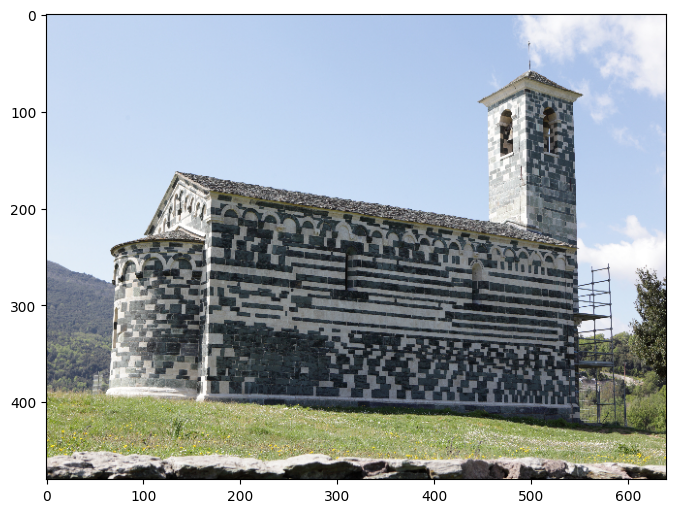

In [6]:
img1 = cv.imread(ROOT + 'two_view/DPP_0010.png')
img2 = cv.imread(ROOT + 'two_view/DPP_0011.png')

plt.figure(figsize=(8,8))
plt.imshow(img1[:,:,::-1])
plt.show()

### ORB feature 얻기

- 두 장의 영상에 대한 ORB feature를 얻는다.

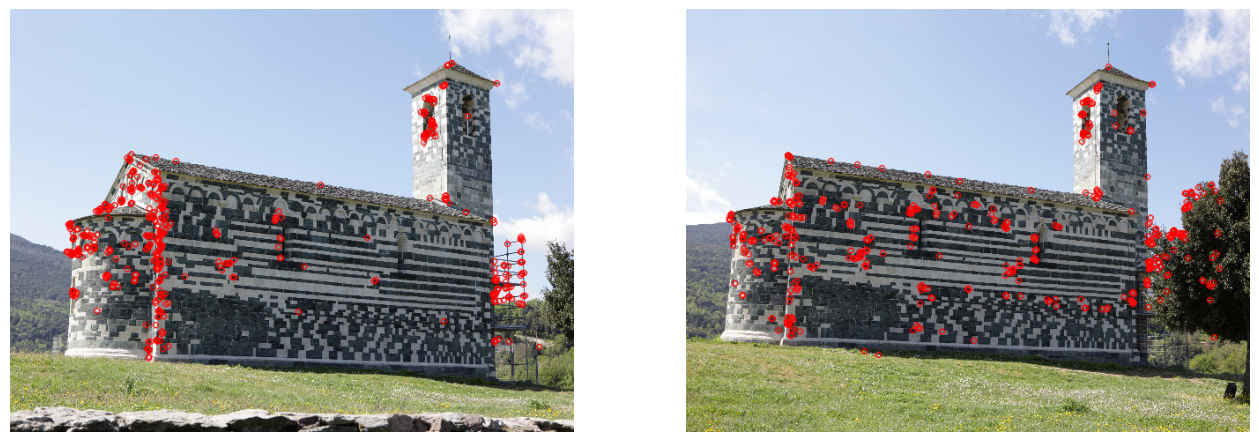

In [7]:
#To-do

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

orb = cv.ORB_create()

kp1 = orb.detect(gray1, None)
kp2 = orb.detect(gray2, None)

kp1, des1 = orb.compute(gray1, kp1)
kp2, des2 = orb.compute(gray2, kp2)

orb_kps1 = cv.drawKeypoints(img1, kp1, None, color=(0, 0, 255), flags=0)
orb_kps2 = cv.drawKeypoints(img2, kp2, None, color=(0, 0, 255), flags=0)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(orb_kps1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(orb_kps2[:,:,::-1])
plt.axis('off')
plt.show()


### Feature Matching

- brute-force matcher를 이용해 ORB feature에 대한 매칭을 진행한다.

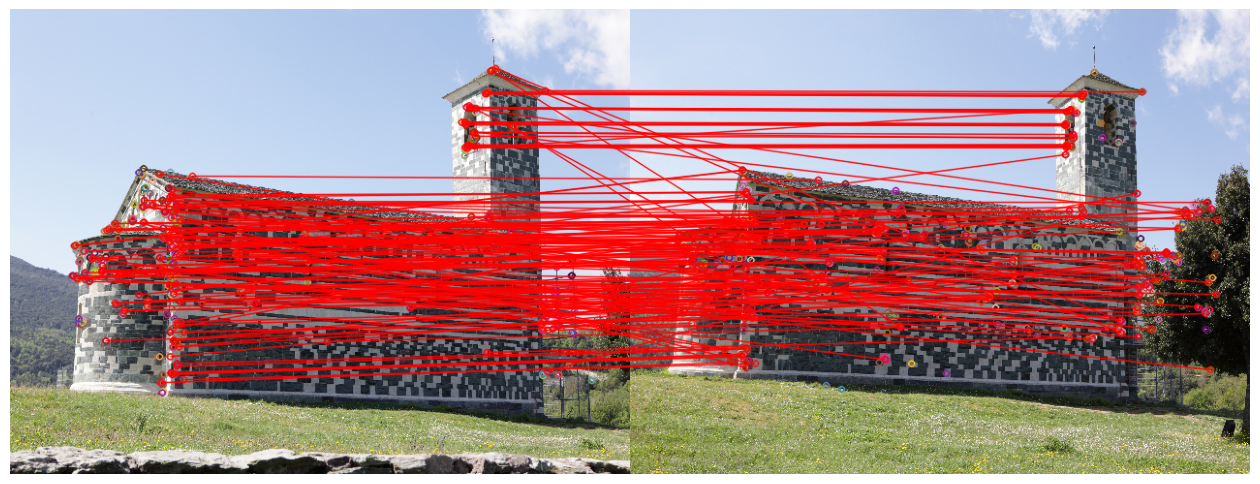

In [8]:
#To-do
orb = cv.ORB_create()

matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des1, des2)
Matching_img = cv.drawMatches(orb_kps1, kp1, orb_kps2, kp2, matches, None,matchColor=(0, 0, 255))

plt.figure(figsize=(16,8))
plt.imshow(Matching_img[:,:,::-1])
plt.axis('off')
plt.show()

### 매칭된 feature 저장하기

In [9]:
# 이 부분은 수정하지 않습니다.

pts1 = []
pts2 = []

for i, m in enumerate(matches):
  pts1.append(kp1[m.queryIdx].pt)
  pts2.append(kp2[m.trainIdx].pt)

pts1 = np.array(pts1, dtype=np.float32)
pts2 = np.array(pts2, dtype=np.float32)

## Fundamental Matrix


**과제**
- 두 장의 이미지에 대한 Fundamental matrix를 구하시오.
- 함수의 출력값인 mask를 이용해 원래 매칭 `pts1`, `pts2`에서 outlier를 제거한 `pts1_F`, `pts2_F`를 구하시오.

관련 함수

`retval, mask	=	cv.findFundamentalMat(	points1, points2, method, ransacReprojThreshold, confidence, maxIters[, mask]	)`


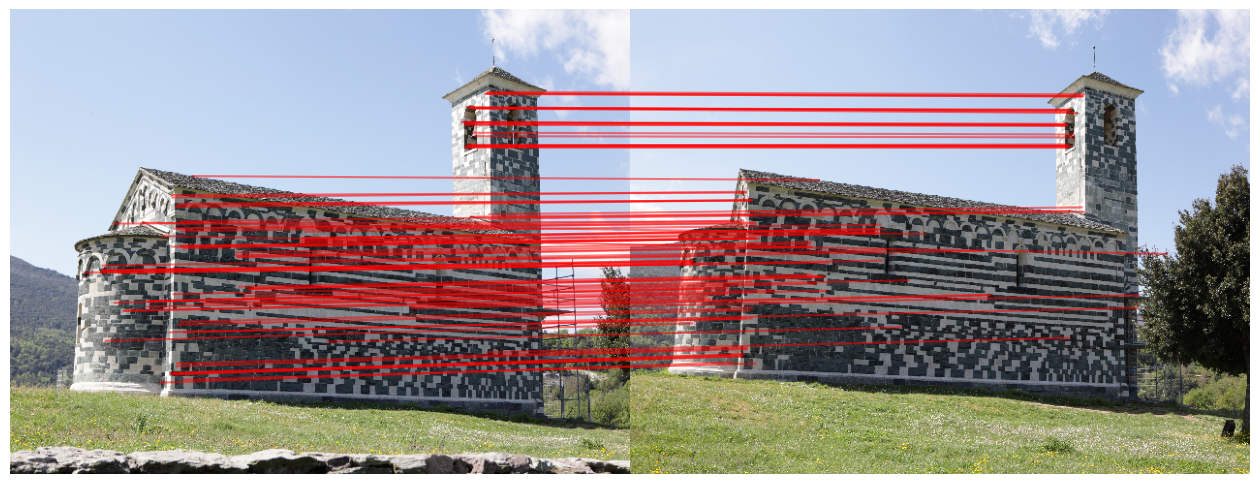

걸러진 매칭 개수 :  89


In [10]:
# To-do
F, mask = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC, 3, 0.99)

pts1_F = pts1[mask.ravel() == 1]
pts2_F = pts2[mask.ravel() == 1]

# 이 부분은 수정하지 않습니다.
img = np.concatenate([img1,img2], axis=1)

plt.figure(figsize=(16,8))
plt.imshow(img[:,:,::-1])
plt.plot([pts1_F[:,0], 640 + pts2_F[:,0]], [pts1_F[:,1], pts2_F[:,1]], 'r-', alpha=0.5)
plt.axis('off')
plt.show()

print('걸러진 매칭 개수 : ', len(pts1) - len(pts1_F))

## Essential Matrix


**과제**
- 두 장의 이미지에 대한  Essential Matrix를 구하시오.
- 위와 같은 방법으로 `pts1_E`, `pts2_E`를 구하시오.

관련 함수

`retval, mask	=	cv.findEssentialMat(	points1, points2[, focal[, pp[, method[, prob[, threshold[, mask]]]]]]	)`


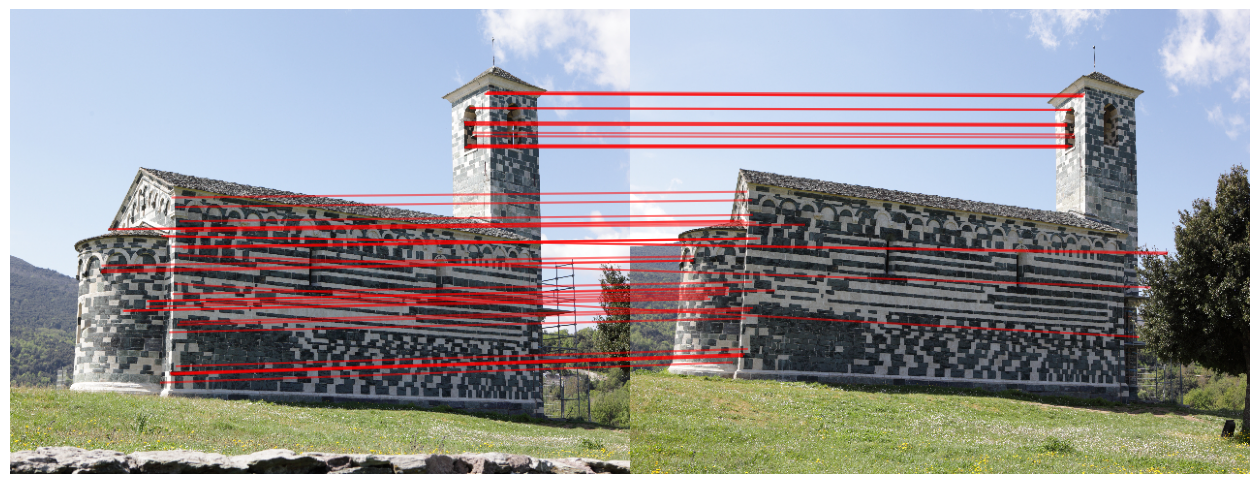

걸러진 매칭 개수 :  135


In [11]:
focal = 640.0
pp = (320, 240)

# To-do
E, mask = cv.findEssentialMat(pts1, pts2, focal=focal, pp=pp, method=cv.RANSAC, prob=0.999, threshold=1.0)

pts1_E = pts1[mask.ravel() == 1]
pts2_E = pts2[mask.ravel() == 1]

# 이 부부은 수정하지 않습니다.
img = np.concatenate([img1, img2], axis=1)

plt.figure(figsize=(16,8))
plt.imshow(img[:,:,::-1])
plt.plot([pts1_E[:,0], 640 + pts2_E[:,0]], [pts1_E[:,1], pts2_E[:,1]], 'r-', alpha=0.5)
plt.axis('off')
plt.show()

print('걸러진 매칭 개수 : ', len(pts1) - len(pts1_E))

## 두 이미지 사이의 회전 행렬과 이동 벡터 찾기

**과제**
- 위에서 구한 Essential Matix를 이용해 회전 행렬과 이동 벡터을 구하시오.
  - inlier의 갯수와 구한 회전 행렬, 이동 벡터를 출력할 것
- 위와 같은 방법으로 `pts1_P`, `pts2_P`를 구하시오.
- `cv.decomposeEssentialMat()`함수를 찾아보고 `cv.recoverPose()`함수와의 차이점을 설명하시오.

관련 함수

- `retval, R, t, mask	=	cv.recoverPose(	E, points1, points2[, R[, t[, focal[, pp[, mask]]]]])`


Inlier의 개수: 8670
회전 행렬 R : 
 [[ 0.99959112 -0.02063255 -0.0197963 ]
 [ 0.02052226  0.99977281 -0.00575865]
 [ 0.01991062  0.00535004  0.99978745]]
이동 벡터 t : 
 [[-0.69101396]
 [-0.04325033]
 [ 0.72154634]]


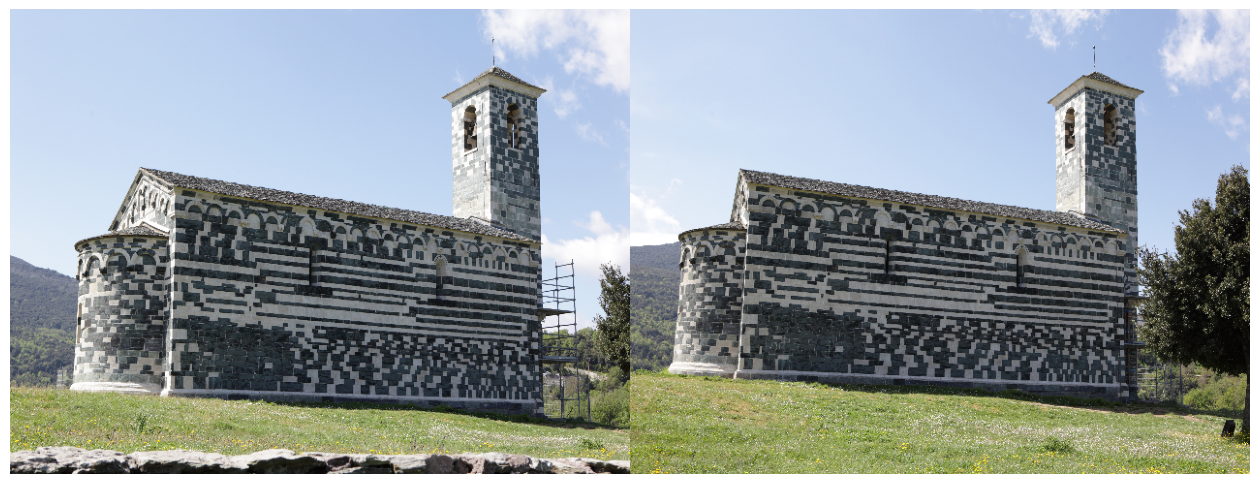

In [12]:
# To-do
retval, R, t, mask = cv.recoverPose(E, pts1_E, pts2_E, focal=focal, pp=pp)

inlier_count = np.sum(mask)
print("Inlier의 개수:", inlier_count)
print("회전 행렬 R : \n", R)
print("이동 벡터 t : \n", t)

# pts1_P, pts2_P
pts1_P = pts1_E[mask.ravel() == 1]
pts2_P = pts2_E[mask.ravel() == 1]

# 이 부분은 수정하지 않습니다.
img = np.concatenate([img1, img2], axis=1)

plt.figure(figsize=(16,8))
plt.imshow(img[:,:,::-1])
plt.plot([pts1_P[:,0], 640 + pts2_P[:,0]], [pts1_P[:,1], pts2_P[:,1]], 'r-', alpha=0.5)
plt.axis('off')
plt.show()

### 시각화

다음 코드는 두 이미지의 회전/이동 관계를 시각화하는 코드이다.

**과제**
- 다음 코드를 해석하여 설명하시오. (주석, markdown 모두 허용)

In [15]:

def draw_axis_3dax(ax, R, t, scale=0.1):
    # 회전 행렬 R과 이동 벡터 t를 기반으로 x, y, z 축의 끝점을 계산합니다
    xaxis = t + R[:, 0] * scale #x축의 끝점을 계산
    yaxis = t + R[:, 1] * scale #y축의 끝점을 계산
    zaxis = t + R[:, 2] * scale #z축의 끝점을 계산

    # x축을 그림. 시작점은 원점(t)에서 끝점(xaxis)까지의 선
    ax.plot([t[0], xaxis[0]], [t[1], xaxis[1]], [t[2], xaxis[2]], 'r-') #빨간색 x축 그리기
    ax.plot([t[0], yaxis[0]], [t[1], yaxis[1]], [t[2], yaxis[2]], 'g-') # 초록색 y축 그리기
    ax.plot([t[0], zaxis[0]], [t[1], zaxis[1]], [t[2], zaxis[2]], 'b-') #파란색 z축 그리기

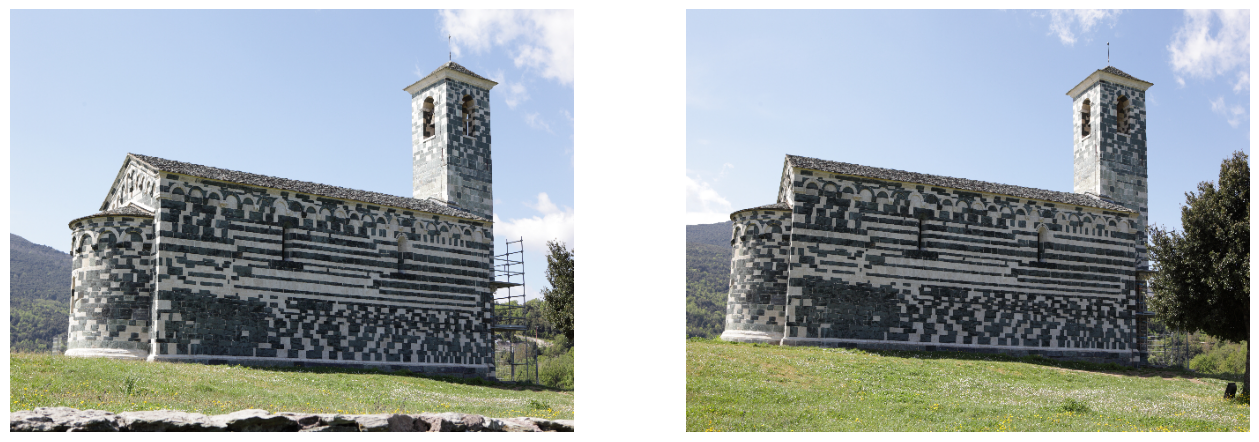

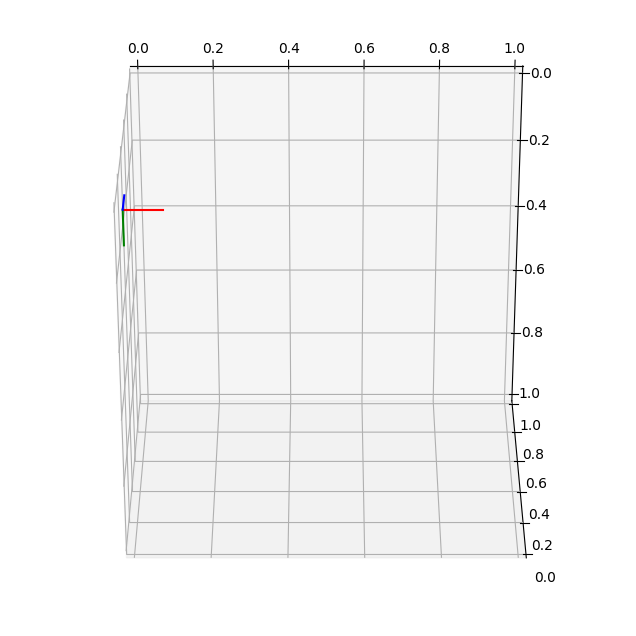

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# 이미지의 높이와 너비 추출합니다
h, w = img1.shape[:2]

# 이미지의 가로 세로 비율 계산합니다
xmax = w / np.maximum(h, w)
ymax = h / np.maximum(h, w)

# 이미지 크기 조정 및 정규화합니다
img1_n = cv.resize(img1, dsize=(40, 30)) / 255.0
img2_n = cv.resize(img2, dsize=(40, 30)) / 255.0

# 이미지 출력
fig = plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(img1[:, :, ::-1], origin='upper', extent=[-xmax, xmax, -ymax, ymax])
plt.axis('off')

plt.subplot(122)
plt.imshow(img2[:, :, ::-1], origin='upper', extent=[-xmax, xmax, -ymax, ymax])
plt.axis('off')

plt.show()

# 3D 그래프 설정합니다
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 그래프 시각화 설정합니다
ax.view_init(elev=-60, azim=-90)

# 원점과 단위 회전 행렬 그리기
draw_axis_3dax(ax, R=np.eye(3), t=np.array([0, 0, 0]))

# 회전 행렬과 이동 벡터 그리기
draw_axis_3dax(ax, R=R, t=np.squeeze(1.0 * t, axis=-1))

# 그래프 축 범위 설정
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_zlim(0.0, 1.0)

plt.show() #시각화 마무리
